### IMPORT THE NECESSARY LIBRARIES
##### we used the following libraries:
##### Pandas, Numpy, Seaborn, Matplotlib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### READ THE DATASETS
##### we use the pandas library to read the datatsets

In [2]:
df = pd.read_csv('TravelInsurancePrediction.csv')
df

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


### Display the info of the dataset
##### this is to check our datasets, to show our columns, Non-Null count values and Datatype

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


### DESCRIBE THE DATASETS
##### values described include: count, mean, standard deviation, min, 25%, 50%, 75%, max

In [4]:
df.describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


### CHECK FOR NULL VALUES IN THE DATASETS

In [5]:
df.isnull().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

### CHECKING THE UNIQUENESS OF THE DATASET
##### this is to check the uniqness of our data, i.e to see the number of the categorical data

In [6]:
df.nunique()

Unnamed: 0             1987
Age                      11
Employment Type           2
GraduateOrNot             2
AnnualIncome             30
FamilyMembers             8
ChronicDiseases           2
FrequentFlyer             2
EverTravelledAbroad       2
TravelInsurance           2
dtype: int64

### CONVERT ALL CATEGORICAL DATA TO NUMBER LABELS
##### since our model can only work on numeric values we have to make sure alphabetical categories are in figures

##### after transformation 0 will represent Government Sector, then 1 will represent private sector/ self employed

In [9]:
from sklearn.preprocessing import LabelEncoder
employment = LabelEncoder()
df['Employment Type']=employment.fit_transform(df['Employment Type'])


##### Here we convert the 'yes or no' to number, value '1' means Graduate and '0' means not a graduate

In [10]:
graduate = LabelEncoder()
df['GraduateOrNot']=graduate.fit_transform(df['GraduateOrNot'])

##### In this place we, the value 0 means not a frequent traveller and 1 means a frequent traveller

In [11]:
frequent = LabelEncoder()
df['FrequentFlyer']=frequent.fit_transform(df['FrequentFlyer'])

##### Here value 1 means the person has travelled abroad and 0 means the person hasn't ever travelled abroad

In [12]:
EverTravelled = LabelEncoder()
df['EverTravelledAbroad']=EverTravelled.fit_transform(df['EverTravelledAbroad'])

In [13]:
df

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,0,1,400000,6,1,0,0,0
1,1,31,1,1,1250000,7,0,0,0,0
2,2,34,1,1,500000,4,1,0,0,1
3,3,28,1,1,700000,3,1,0,0,0
4,4,28,1,1,700000,8,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,1,1,1500000,4,0,1,1,1
1983,1983,28,1,1,1750000,5,1,0,1,0
1984,1984,28,1,1,1150000,6,1,0,0,0
1985,1985,34,1,1,1000000,6,0,1,1,1


In [ ]:
      #df.Employment Type ,df.GraduateOrNot, df.FrequentFlyer, df.EverTravelledAbroad])

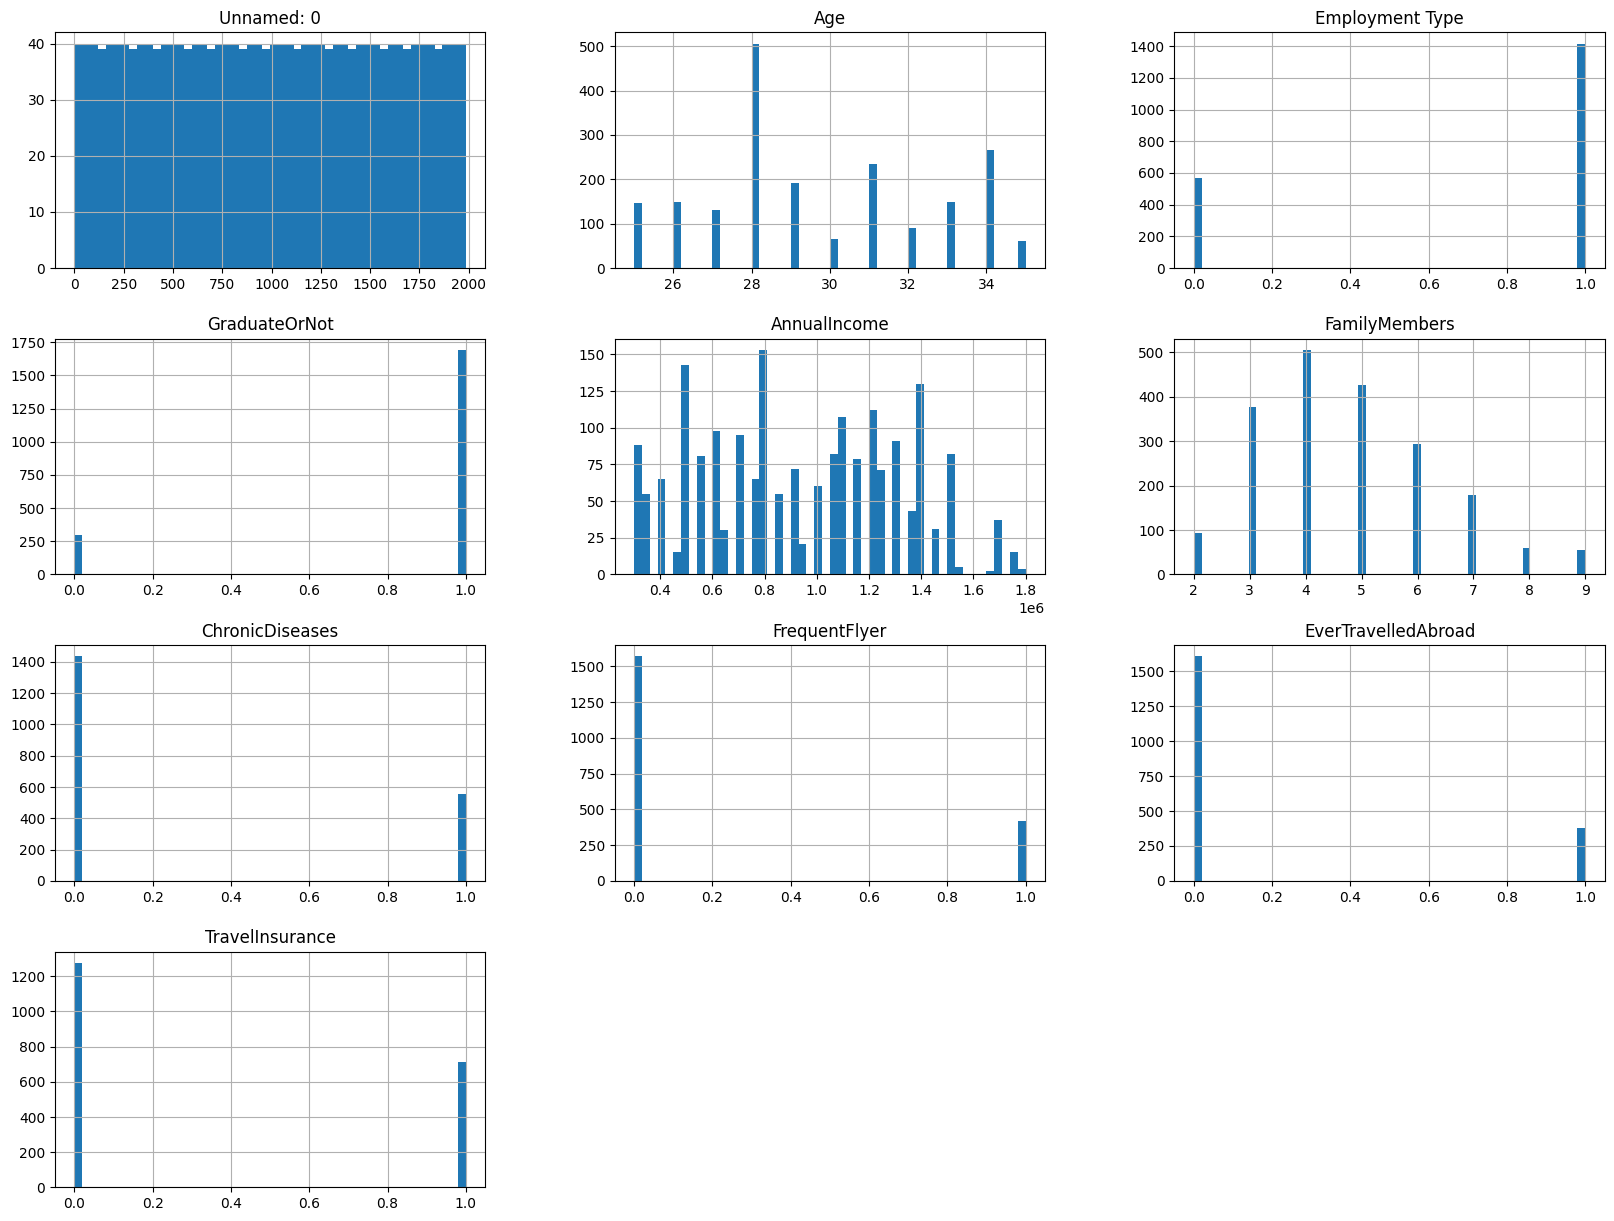

In [14]:
df.hist(bins=50,figsize=(20,15))
plt.show()

<Axes: ylabel='count'>

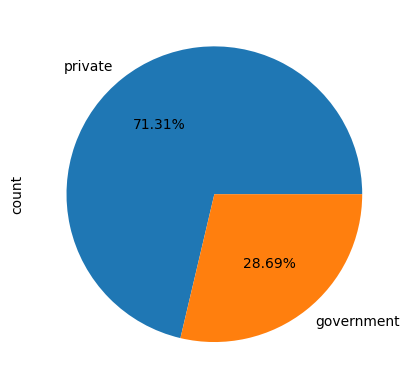

In [15]:
df['Employment Type'].value_counts().plot(kind='pie', explode=[0, 0], labels=['private','government'],autopct='%1.2f%%')

<Axes: ylabel='count'>

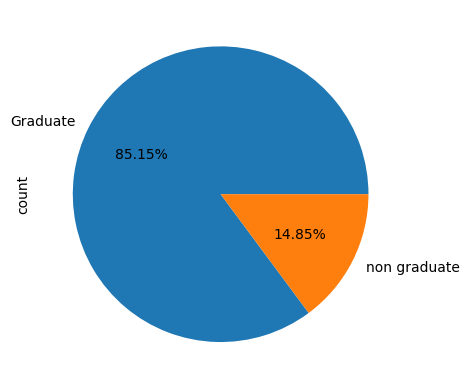

In [16]:
df['GraduateOrNot'].value_counts().plot(kind='pie', explode=[0, 0], labels=['Graduate','non graduate'],autopct='%1.2f%%')

<Axes: ylabel='count'>

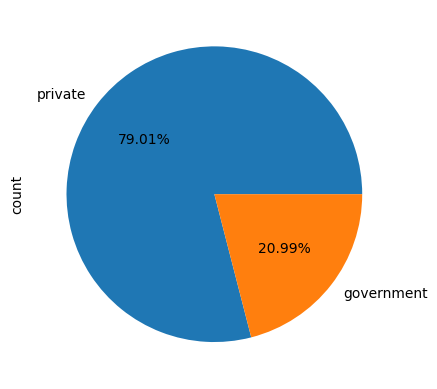

In [17]:
df['FrequentFlyer'].value_counts().plot(kind='pie', explode=[0, 0], labels=['private','government'],autopct='%1.2f%%')

<Axes: ylabel='count'>

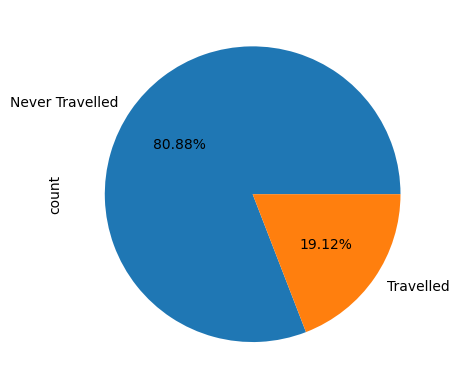

In [18]:
df['EverTravelledAbroad'].value_counts().plot(kind='pie', explode=[0, 0], labels=['Never Travelled','Travelled'],autopct='%1.2f%%')

<Axes: ylabel='count'>

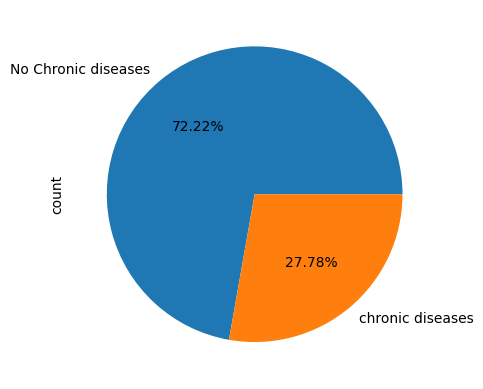

In [19]:
df['ChronicDiseases'].value_counts().plot(kind='pie', explode=[0, 0], labels=['No Chronic diseases','chronic diseases'],autopct='%1.2f%%')

# FROM THE PLOTS WE MADE ABOVE WE OBSERVED THE FOLLOWING:
##### 1. 28 seems to be the most frequent age in the datasets 
##### 2. 72.22 percent of the people in the dataset do not have chronicdiseases
##### 3. only 19.12 percent have travelled abroad

### BUILDING THE MACHINE LEARNING MODEL

In [20]:
x = df.drop(['TravelInsurance', 'Unnamed: 0'], axis='columns')
y = df['TravelInsurance']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=3)

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.fit_transform(x_test)

In [25]:
import keras

In [26]:
model = keras.Sequential([
                         keras.layers.Flatten(),
                         keras.layers.Dense(8, activation='relu'),
                         keras.layers.Dense(10,activation='relu'),
                         keras.layers.Dense(15,activation='relu'),
                         keras.layers.Dense(1, activation='sigmoid')
])

In [28]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [29]:
history = model.fit(x_train_std, y_train, validation_split=0.1, epochs=100)

Epoch 1/100


45/45 [==============================] - 20s 65ms/step - loss: 0.6468 - accuracy: 0.6497 - val_loss: 0.6206 - val_accuracy: 0.6792
Epoch 2/100
45/45 [==============================] - 0s 6ms/step - loss: 0.6077 - accuracy: 0.6937 - val_loss: 0.6052 - val_accuracy: 0.6981
Epoch 3/100
45/45 [==============================] - 0s 4ms/step - loss: 0.5876 - accuracy: 0.7385 - val_loss: 0.5926 - val_accuracy: 0.7170
Epoch 4/100
45/45 [==============================] - 0s 6ms/step - loss: 0.5670 - accuracy: 0.7524 - val_loss: 0.5783 - val_accuracy: 0.7296
Epoch 5/100
45/45 [==============================] - 0s 5ms/step - loss: 0.5458 - accuracy: 0.7580 - val_loss: 0.5705 - val_accuracy: 0.7358
Epoch 6/100
45/45 [==============================] - 0s 7ms/step - loss: 0.5332 - accuracy: 0.7601 - val_loss: 0.5705 - val_accuracy: 0.7358
Epoch 7/100
45/45 [==============================] - 0s 9ms/step - loss: 0.5272 - accuracy: 0.7622 - val_loss: 0.5662 - val_accuracy: 0.7358
Epoch 8/1

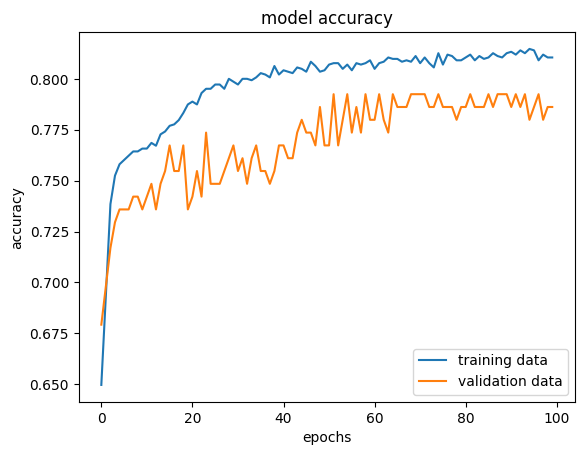

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.legend(['training data', 'validation data'], loc='lower right')

Text(0.5, 1.0, 'model loss')

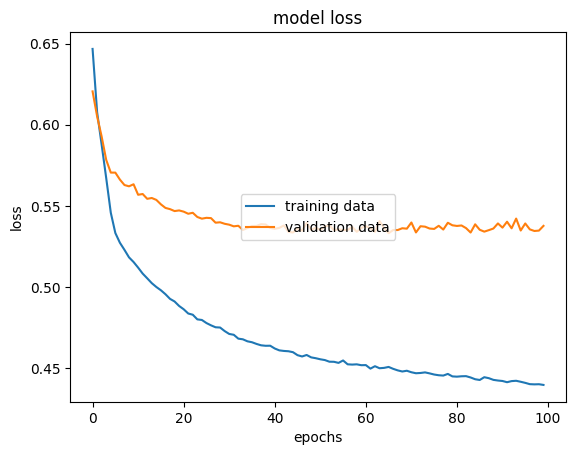

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.legend(['training data', 'validation data'], loc='center')
plt.title('model loss')


##### Testing the trained network

In [32]:
input = (22, 1, 0, 340000,4,1,1,1)

In [33]:
input_to_array = np.asarray(input)

In [34]:
input_to_array_reshaped = input_to_array.reshape(1, -1)

In [35]:
input_data_scaled = scaler.transform(input_to_array_reshaped)

c:\Users\TeeFaith\anaconda3\envs\kenny\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [36]:
prediction = model.predict(input_data_scaled)
print(prediction)

1/1 [==============================] - 0s 192ms/step
[[0.07876457]]
